In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
header = ['Age', 'Year of Operation', 'Number of axillary nodes', 'Survival Status']

In [3]:
df = pd.read_csv('haberman.data', header = None)

In [4]:
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.columns = header

In [6]:
df.head()

,Age,Year of Operation,Number of axillary nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
df['Survival Status'].value_counts()

1    225
2     81
Name: Survival Status, dtype: int64

In [8]:
df.describe()

,Age,Year of Operation,Number of axillary nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
df['Survival Status'] = df['Survival Status'].apply(lambda x: '1' if x == 1 else '0')

In [10]:
df.head(10)

,Age,Year of Operation,Number of axillary nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [15]:
df.shape

(306, 4)

Research Question : 1   

Are patients with lower number of positive axillary nodes detected more likely to survive?

H0 = There is no relationship between number of positive axillary nodes detected and survival status; u1 = u2 (u1 - u2 = 0)

Ha = Patients with lower number of positive axillary nodes detected are more likely to survive; u1 < u2 (u1 - u2 < 0)

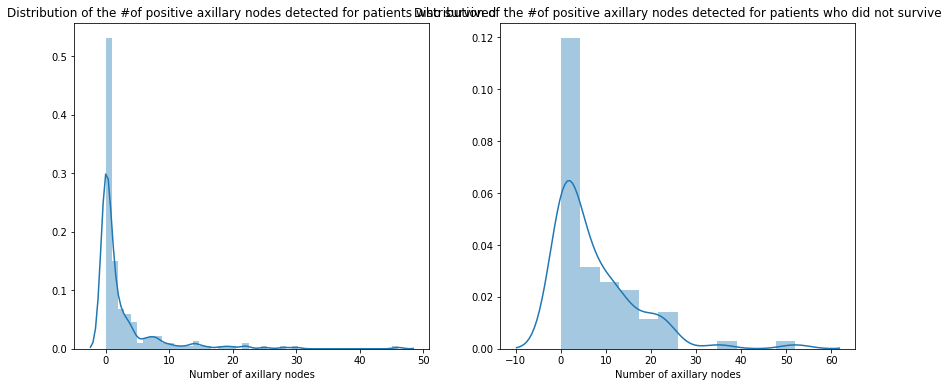

In [28]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (14, 6))

ax1.set(title = 'Distribution of the #of positive axillary nodes detected for patients who survived')
#print(df['Number of axillary nodes'][df['Survival Status'] == '1'])
sns.distplot(df['Number of axillary nodes'][df['Survival Status'] == '1'], ax = ax1)

ax2.set(title = 'Distribution of the #of positive axillary nodes detected for patients who did not survive')
sns.distplot(df['Number of axillary nodes'][df['Survival Status']== '0'], ax = ax2)

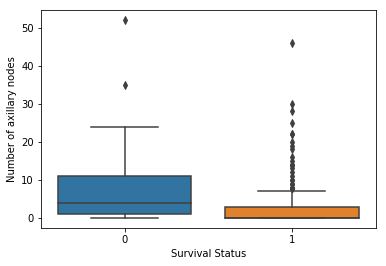

In [29]:
sns.boxplot(x = 'Survival Status', y = 'Number of axillary nodes', data = df)

According to the assumptions for independent sample t-test, the data should be normally distributed and is less important if sample size >= 30

As we can see from the above two graphs that the data samples are skewed and are having outliers, but we are going to proceed with the independent t-test because our sample size is greater than 30

In [32]:
print('The Mean number of positive axillary nodes detected who survived: {}'.format(df['Number of axillary nodes'][df['Survival Status'] == '1'].mean()))
print('The Mean number of positive axillary nodes detected who did not survived: {}'.format(df['Number of axillary nodes'][df['Survival Status'] == '0'].mean()))

The Mean number of positive axillary nodes detected who survived: 2.7911111111111113
The Mean number of positive axillary nodes detected who did not survived: 7.45679012345679


The mean shows that, on average, the patients with fewer number of positive axillary nodes detected are more likely to survive, but is the difference in means is due to the sampling variation, or does the data provide enough evidence that fewer number of positive axillary nodes detected are actually more likely to survive. To prove that, we need to perform statistical test and let's assume the significance level is 0.05.

In [35]:
from scipy import stats

In [38]:
results = stats.ttest_ind(df['Number of axillary nodes'][df['Survival Status'] == '1'], df['Number of axillary nodes'][df['Survival Status'] == '0'])

In [39]:
results

Ttest_indResult(statistic=-5.219167426001108, pvalue=3.335385116660208e-07)

The results shows that the pvalue is smaller than the significant value (p = 0.05), hence we can reject the null hypothesis and conclude that patients with fewer number of positive axillary nodes detected are more likely to survive.